In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose 

In [2]:
# date_range로 데이터를 생성하면 default값으로 일 별 데이터가 생성된다.
pd.date_range('17/6/2020', periods=5)

DatetimeIndex(['2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
               '2020-06-21'],
              dtype='datetime64[ns]', freq='D')

In [3]:
# freq로 여러 기준으로 데이터를 생성할 수 있다.
pd.date_range('17/6/2020', periods=5, freq='M')

DatetimeIndex(['2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31'],
              dtype='datetime64[ns]', freq='M')

In [4]:
pd.date_range('17/6/2020', periods=5, freq='W')

DatetimeIndex(['2020-06-21', '2020-06-28', '2020-07-05', '2020-07-12',
               '2020-07-19'],
              dtype='datetime64[ns]', freq='W-SUN')

In [5]:
pd.date_range('17/6/2020', periods=5, freq='D')

DatetimeIndex(['2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
               '2020-06-21'],
              dtype='datetime64[ns]', freq='D')

In [6]:
# B는 토, 일을 제외한 요일들을 출력한다. business
pd.date_range('17/6/2020', periods=5, freq='B')

DatetimeIndex(['2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22',
               '2020-06-23'],
              dtype='datetime64[ns]', freq='B')

In [7]:
# Q는 3, 6, 9, 12 분기별로 월을 출력한다.
pd.date_range('17/6/2020', periods=5, freq='Q')

DatetimeIndex(['2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [8]:
pd.date_range('17/6/2020', '30/7/2020')

DatetimeIndex(['2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02',
               '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
               '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10',
               '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14',
               '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18',
               '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22',
               '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# 임의의 데이터를 생성하여 그래프를 확인해보자.
sales = [125, 153, 106, 88, 118, 161, 133, 102, 138, 144, 
         113, 80, 109, 137, 125, 109, 130, 165, 128, 96]

In [10]:
# 2020년 부터 분기별 20개의 데이터를 생성한다.
dt = pd.date_range('1/1/2020', periods=20, freq='Q')
df = pd.DataFrame({'dt':dt, 'sales':sales})
df.set_index('dt', inplace=True)

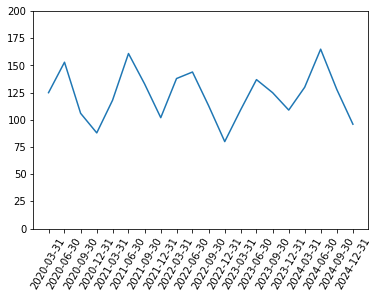

In [11]:
# 다음과 같이 분기별로 데이터를 생성한 것을 그래프로 확인할 수 있다.
plt.plot(df)
plt.xticks(dt, rotation=60)
plt.ylim(0, 200)
plt.show()

In [12]:
# 3년에 걸친 임의의 데이터를 생성하여 그래프를 그려보자.
expense_2020 = [170, 180, 205, 230, 240, 315, 360, 290, 240, 240, 230, 190]
expense_2021 = [180, 205, 215, 245, 265, 330, 400, 335, 260, 270, 255, 220]
expense_2022 = [195, 210, 230, 280, 290, 390, 420, 330, 290, 295, 280, 250]

In [13]:
expense = expense_2020 + expense_2021 + expense_2022

In [14]:
dt = pd.date_range('1/1/2020', periods=36, freq='M')
df = pd.DataFrame({'dt':dt, 'expense':expense})
df.set_index('dt', inplace=True)

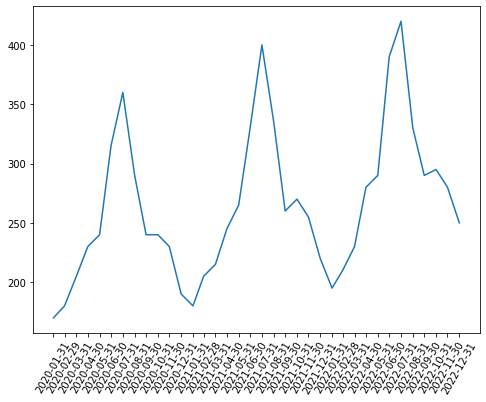

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(df)
plt.xticks(dt, rotation=60)
plt.show()

In [16]:
# linear regression을 이용한 시계열 예측
year = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sales = [21.6, 22.9, 25.5, 21.9, 23.9, 27.5, 31.5, 29.7, 28.6, 31.4]

df = pd.DataFrame({'year':year, 'sales':sales})

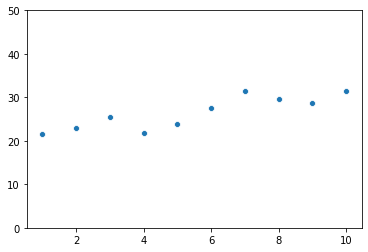

In [17]:
sns.scatterplot(year, sales)
plt.ylim(0, 50)
plt.show()

In [18]:
x = df[['year']]
y = df[['sales']]
lr = LinearRegression()
lr.fit(x, y)
print('coef : ', lr.coef_)
print('intercept : ', lr.intercept_)
y_pred = lr.predict(x)

coef :  [[1.1]]
intercept :  [20.4]


In [19]:
sales_11 = float(lr.coef_ * 11 + lr.intercept_)
sales_12 = float(lr.coef_ * 12 + lr.intercept_)
year_new = [11, 12]
sales_new = [sales_11, sales_12]
year = year + year_new
sales = sales + sales_new
df = pd.DataFrame({'year':year, 'sales':sales})
df

,year,sales
0,1,21.6
1,2,22.9
2,3,25.5
3,4,21.9
4,5,23.9
5,6,27.5
6,7,31.5
7,8,29.7
8,9,28.6
9,10,31.4


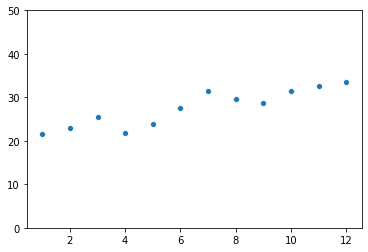

In [20]:
sns.scatterplot(year, sales)
plt.ylim(0, 50)
plt.show()

In [21]:
# 이동평균모형(MA)을 이용한 예측
# 이전의 데이터들의 평균을 이용한 예측
week = np.arange(1, 13)
sales = [17, 21, 19, 23, 18, 16, 20, 18, 22, 20, 15, 22]
# example : sales12 = (sales[9] + sales[10] + sales[11]) / 3

In [22]:
sales_new = []
for i in range(0, 10):
    sales_new.append((sales[i] + sales[i+1] + sales[i+2]) / 3)

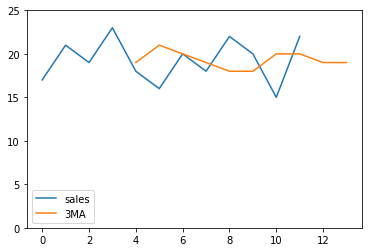

In [23]:
plt.plot(sales, label='sales')
plt.plot(np.arange(4, 14), sales_new, label='3MA')
plt.ylim(0, 25)
plt.legend()
plt.show()

In [24]:
# 지수평활법(Exponential Smoothing)을 이용한 예측
# 가장 최근 데이터에 가장 큰 가중치가 주어지고 시간이 지남에 따라
# 가중치가 기하학적으로 감소되는 가중치 이동 평균 예측 기법
fit1 = SimpleExpSmoothing(sales).fit(smoothing_level=.2)
fit1.predict()
y_pred_exp = fit1.fittedvalues

C:\Users\Msi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


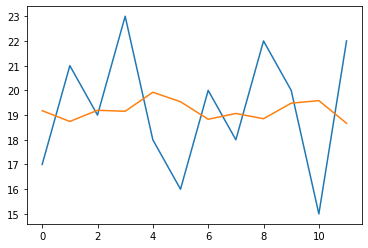

In [25]:
plt.plot(sales, label='sales')
plt.plot(y_pred_exp, label='exp')
plt.show()

In [26]:
# 데이터를 이용한 여러가지 시계열 분석
lawn = pd.read_excel("forecast_data.xlsx", sheet_name = 'Sheet3')
lawn.head()

,Time,Year,Month,Expense
0,1,1,January,170
1,2,1,February,180
2,3,1,March,205
3,4,1,April,230
4,5,1,May,240


In [27]:
# 기존의 데이터를 좀 더 다루기 쉽게 바꾸어 준다.
dt = pd.date_range('1/1/2001', periods=36, freq='M')
df = pd.DataFrame({'time':dt, 'expense':lawn.Expense})
df.set_index('time', inplace=True)
df.head()

,expense
time,
2001-01-31,170
2001-02-28,180
2001-03-31,205
2001-04-30,230
2001-05-31,240


(100, 450)

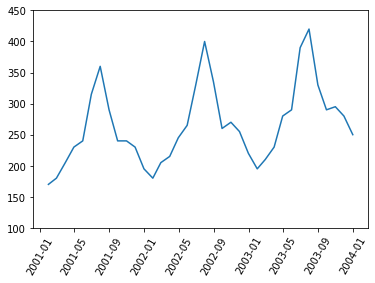

In [28]:
plt.plot(df.expense)
plt.xticks(rotation=60)
plt.ylim(100, 450)

In [29]:
# simple average : 단순예측법
expense_pred = []
for i in lawn.Month[0:12]:
    expense_pred.append(lawn.Expense[lawn.Month == i].mean())

In [30]:
dt_pred = pd.date_range('1/1/2004', periods = 12, freq='M')
df_pred = pd.DataFrame({'time':dt_pred, 'expense':expense_pred})
df_pred.set_index('time', inplace=True)

(100, 450)

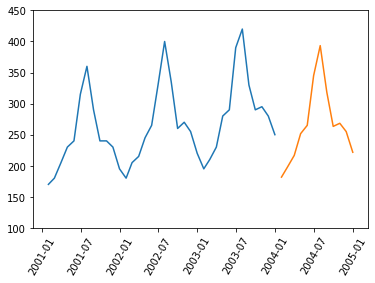

In [31]:
# 그래프의 평균을 통해 나타내기 때문에 다음과 같은 것을 확인할 수 있다.
plt.plot(df.expense)
plt.plot(df_pred.expense)
plt.xticks(rotation=60)
plt.ylim(100, 450)

In [32]:
# linear regression을 통한 시계열 분석
# 범주형 자료를 더미변수로 바꿔준다.
dummy = pd.get_dummies(lawn.Month)
lawn = pd.concat([lawn, dummy], axis = 1)
lawn = lawn.drop('December', axis=1)
lawn.head()

,Time,Year,Month,Expense,April,August,February,January,July,June,March,May,November,October,September
0,1,1,January,170,0,0,0,1,0,0,0,0,0,0,0
1,2,1,February,180,0,0,1,0,0,0,0,0,0,0,0
2,3,1,March,205,0,0,0,0,0,0,1,0,0,0,0
3,4,1,April,230,1,0,0,0,0,0,0,0,0,0,0
4,5,1,May,240,0,0,0,0,0,0,0,1,0,0,0


In [33]:
x = lawn.drop(['Year', 'Month', 'Expense'], axis = 1)
y = lawn.Expense
lr = LinearRegression()
lr.fit(x, y)
test = x.copy()
test = test[:12]
test.Time = np.arange(37, 49)
y_pred = lr.predict(test)

In [34]:
dt_pred = pd.date_range('1/1/2004', periods = 12, freq='M')
df_pred = pd.DataFrame({'time':dt_pred, 'expense':y_pred})
df_pred.set_index('time', inplace=True)

(100, 450)

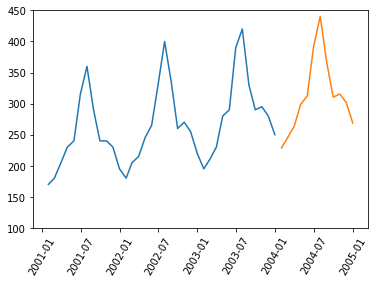

In [35]:
plt.plot(df.expense)
plt.plot(df_pred.expense)
plt.xticks(rotation=60)
plt.ylim(100, 450)

In [36]:
# 분해 시계열 방법을 이용한 시계열 분석
# 분해 시계열이란 시계열에 영향을 주는 일반적인 요인을 시계열에서 분리해 
# 분석하는 방법을 말하며, 회귀분석적인 방법을 주로 사용하고 있다.
# 시계열을 구성하는 요소는 4가지로 분류된다.
# 추세요인(trend)
# 계절요인(seasonal)
# 순환요인(cyclical)
# 불규칙요인(irregular)
dt = pd.date_range('1/1/2001', periods=36, freq='M')
df = pd.DataFrame({'time':dt, 'expense':lawn.Expense})
df.set_index('time', inplace=True)
ts = df.expense

In [37]:
decomposition = seasonal_decompose(ts)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

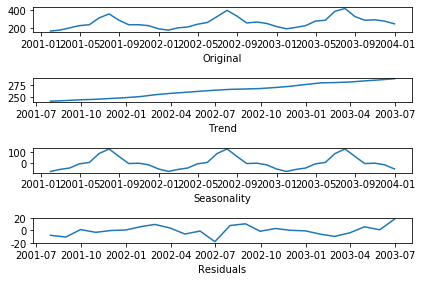

In [41]:
plt.subplot(411)
plt.plot(ts)
plt.xlabel('Original')
plt.subplot(412)
plt.plot(trend,)
plt.xlabel('Trend')
plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonality')
plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residuals')
plt.tight_layout()

In [39]:
ts_adj = ts - seasonal
x = np.arange(1,37).reshape(-1, 1)
y = ts_adj
lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
ts_adj_trend = lr.predict(x)
ts_adj_trend = pd.Series(ts_adj_trend)
ts_adj_trend.index = ts_adj.index
ts_pred = ts_adj_trend + seasonal

In [41]:
test = np.arange(36, 48).reshape(-1, 1)
y_pred = lr.predict(test) + seasonal[:12]

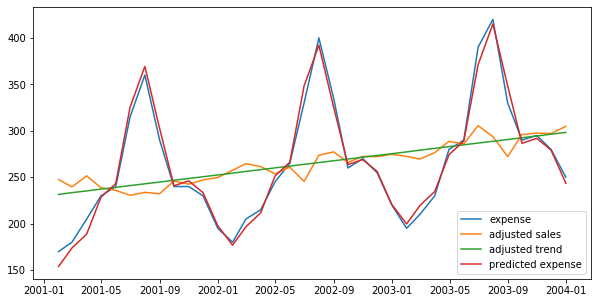

In [42]:
plt.figure(figsize=(10,5))
plt.plot(df.expense, label='expense')
plt.plot(ts_adj, label='adjusted sales')
plt.plot(ts_adj_trend, label='adjusted trend')
plt.plot(ts_pred, label='predicted expense')
plt.legend()